## Observations and Insights 

In [ ]:
# In this study for Pymaceuticals, 249 mice identified with the SCC tumor growth were treated through a variety of drug 
# regimens.
# From this analysis of the 45 day study, where tumor development was observed and measured, I make the following observations:
#    1. 

In [25]:
#%matplotlib notebook

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
studyresults_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="inner")

# Display the data table for preview
studyresults_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [27]:
# Checking the number of mice.
unique_mice = studyresults_df['Mouse ID'].unique()
uniquemice = len(unique_mice)
uniquemice

249

In [28]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_df = studyresults_df[studyresults_df.duplicated(['Mouse ID', 'Timepoint'], keep = False)]


In [29]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicated_df = studyresults_df[studyresults_df.duplicated(['Mouse ID', 'Timepoint'], keep = False)]
duplicated_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [30]:
#Create a clean DataFrame by dropping the duplicate mouse by its ID.
# I took this to mean the duplicate mouse entries gets dropped in their entirety, not keeping either the first or the last values
cleaned_df = pd.concat([studyresults_df, duplicated_df, duplicated_df]).drop_duplicates(keep=False)
cleaned_df
type(cleaned_df)
cleaned_df.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

In [31]:
# Checking the number of mice in the clean DataFrame.
clean_mice = cleaned_df['Mouse ID'].unique()
cleanmice = len(clean_mice)
cleanmice

249

In [149]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straightforward, creating multiple series and putting them all together at the end.
#list of Drug Regimen's
unique_regimen = cleaned_df['Drug Regimen'].unique()
regimen_mean=cleaned_df.loc[cleaned_df['Drug Regimen']=='Capomulin'].mean()
print(regimen_mean['Tumor Volume (mm3)'])


## this produces the correct answer as a single figure, not a series of all drug regimens. Im going to leave this and move on.

40.67574114099999


In [33]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
#do basic calculations
summary_stats_df = cleaned_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std', 'sem']})
summary_stats_df


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.458254  50.854632  44.053659  6.637293  0.540135
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [151]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
# Create a group based on the Drug Regimen
drug_group = cleaned_df.groupby('Drug Regimen')

# Count how many times 
count_drug_regimen = drug_group['Drug Regimen'].count()
count_drug_regimen
#checking the data, this is a series

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     151
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Drug Regimen, dtype: int64

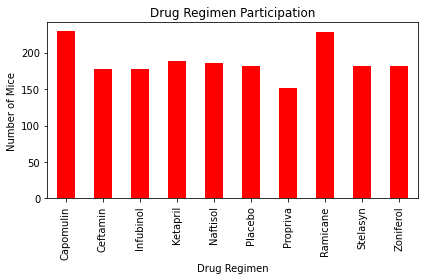

In [35]:
#create bar chart
# Create a bar chart based on the group seriese
regimen_chart = count_drug_regimen.plot(kind="bar", title = "Drug Regimen Participation", color = "Red", align='center')

# Set the xlabel and ylabel using class methods
regimen_chart.set_xlabel("Drug Regimen")
regimen_chart.set_ylabel("Number of Mice")

plt.tight_layout()

In [36]:
#create ticks for bar chart axis
# Set x axis and tick locations
x_axis = np.arange(len(count_drug_regimen))

#create a number equal to the size (length ) of the dataframe
tick_locations = [value for value in x_axis]

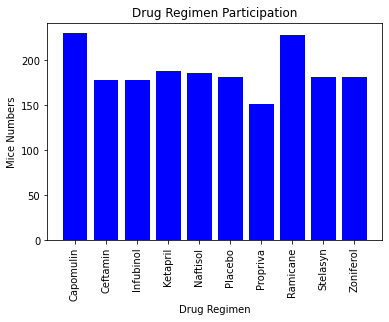

In [37]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis=np.arange(len(count_drug_regimen))
plt.bar(x_axis, count_drug_regimen, color='b',align='center')
plt.title('Drug Regimen Participation')
plt.xlabel('Drug Regimen')
plt.ylabel('Mice Numbers')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, count_drug_regimen.index, rotation = 'vertical')
plt.show()

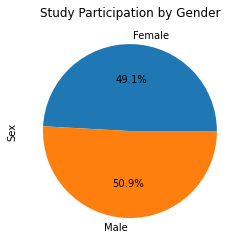

In [38]:
# Create a group based on the gender & Mouse ID so that we are looking at unique mice to determine male versus female

gender_group = cleaned_df.groupby('Mouse Id', 'Sex')

# Count how many times 
## I thought this should be based on unique mouse id counts, but could not get the code to work so abandoned that approach.
count_gender = gender_group['Sex'].count()

# Generate a pie plot showing the distribution of female versus male mice using pandas
count_gender.plot(kind='pie', title='Study Participation by Gender', y='Gender', autopct='%1.1f%%')

Text(0, 0.5, 'Gender')

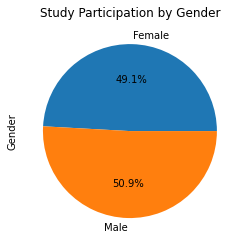

In [39]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
legend=(count_gender.index)
plt.pie(count_gender, labels = legend, autopct="%1.1f%%")
plt.title('Study Participation by Gender')
plt.ylabel('Gender')


## Quartiles, Outliers and Boxplots

In [40]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

###get a subset of the data that is just the Drug Regimen's required
subset_df=cleaned_df[cleaned_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# Start by getting the last (greatest) timepoint for each mouse
subset_max_df=subset_df.groupby(['Mouse ID']).agg({'Timepoint':['max']})

###change the odd column name to make the next bit easier
subset_max_df.columns=['Max Timepoint']

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
subset_output_df=pd.merge(subset_max_df, subset_df, how='left',on=['Mouse ID'])

### create a dataframe with the results as at the last timepoint
subset_output_df['diff']=subset_output_df['Max Timepoint'] - subset_output_df['Timepoint']
subset_output_df



,Mouse ID,Max Timepoint,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),diff
0,a203,45,0,45.000000,0,Infubinol,Female,20,23,45
1,a203,45,5,48.508468,0,Infubinol,Female,20,23,40
2,a203,45,10,51.852437,1,Infubinol,Female,20,23,35
3,a203,45,15,52.777870,1,Infubinol,Female,20,23,30
4,a203,45,20,55.173336,1,Infubinol,Female,20,23,25
...,...,...,...,...,...,...,...,...,...,...
809,z581,45,25,54.316407,2,Infubinol,Female,24,25,20
810,z581,45,30,56.286750,2,Infubinol,Female,24,25,15
811,z581,45,35,58.628399,3,Infubinol,Female,24,25,10
812,z581,45,40,60.053740,3,Infubinol,Female,24,25,5


In [41]:
### create a dataset of max timepoint results per mouse, not yet sure if this is needed

last_timepoint_vol=subset_output_df.loc[(subset_output_df['diff'] == 0) & (subset_output_df['Max Timepoint']> 0)]
last_timepoint_vol
lasttimepoint_vol=last_timepoint_vol[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Drug Regimen','Weight (g)']]
print(lasttimepoint_vol)
#this is a dataframe of one record per mouse per drug regimen, being the highest timepoint for each mouse


    Mouse ID  Timepoint  Tumor Volume (mm3) Drug Regimen  Weight (g)
9       a203         45           67.973419    Infubinol          23
19      a251         45           65.525743    Infubinol          25
29      a275         45           62.999356     Ceftamin          28
39      a411         45           38.407618     Ramicane          22
49      a444         45           43.047543     Ramicane          25
..       ...        ...                 ...          ...         ...
773     y769         45           68.594745     Ceftamin          27
783     y793         45           31.896238    Capomulin          17
793     y865         45           64.729837     Ceftamin          26
803     z578         45           30.638696     Ramicane          16
813     z581         45           62.754451    Infubinol          25

[96 rows x 5 columns]


In [42]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = lasttimepoint_vol['Drug Regimen'].unique()
treatments_list=treatments.tolist()
treatments_list

['Infubinol', 'Ceftamin', 'Ramicane', 'Capomulin']

In [43]:
# Create empty list to fill with tumor vol data (for plotting)
plotting_list=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers.
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
### trying a loop through with a read inside the loop
for drug_regimen in treatments_list:
    drug_regimen_group=lasttimepoint_vol.loc[lasttimepoint_vol['Drug Regimen']==drug_regimen]
    tumor_vol=drug_regimen_group['Tumor Volume (mm3)']
 
    # add subset 
    plotting_list.append(tumor_vol)    

    quartiles = tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr=upperq-lowerq
    print(f'IQR for {drug_regimen} is {iqr}')
    
    # Determine outliers using upper and lower bounds  
    lower_b=lowerq-(1.5*iqr)
    upper_b=upperq+(1.5*iqr)
    lower_b=(round(lower_b, 2))
    upper_b=(round(upper_b, 2))
    print(f'Lower Bound for {drug_regimen}:{lower_b}')
    print(f'Upper Bound for {drug_regimen}:{upper_b}')
    
    ##outliers?
    drug_regimen_outliers=(tumor_vol.loc[(lasttimepoint_vol['Tumor Volume (mm3)'] >= upper_b) | (lasttimepoint_vol['Tumor Volume (mm3)'] <= lower_b)]).count()
    
    print(f'The number of possible outliers for {drug_regimen} is {drug_regimen_outliers}') 
    print(f'--------------------------------------- ')

IQR for Infubinol is 11.477135160000003
Lower Bound for Infubinol:36.83
Upper Bound for Infubinol:82.74
The number of possible outliers for Infubinol is 1
--------------------------------------- 
IQR for Ceftamin is 8.57719978
Lower Bound for Ceftamin:43.19
Upper Bound for Ceftamin:77.5
The number of possible outliers for Ceftamin is 0
--------------------------------------- 
IQR for Ramicane is 9.098536719999998
Lower Bound for Ramicane:17.91
Upper Bound for Ramicane:54.31
The number of possible outliers for Ramicane is 0
--------------------------------------- 
IQR for Capomulin is 7.781863460000004
Lower Bound for Capomulin:20.7
Upper Bound for Capomulin:51.83
The number of possible outliers for Capomulin is 0
--------------------------------------- 


In [44]:
boxprops = dict(linestyle='--', linewidth=3, color='darkgoldenrod')
flierprops = dict(marker='o', markerfacecolor='green', markersize=12, linestyle='none')

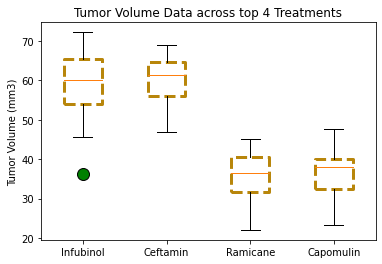

In [45]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(plotting_list, boxprops=boxprops, flierprops=flierprops)
plt.title('Tumor Volume Data across top 4 Treatments')
plt.ylabel('Tumor Volume (mm3)')
ticks=[1,2,3,4]
plt.xticks(ticks, treatments_list)
plt.show()

## Line and Scatter Plots

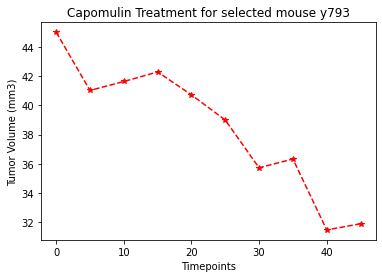

In [137]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
### looks like one mouse, any mouse?

y793_data=cleaned_df.loc[cleaned_df['Mouse ID']=='y793']

plt.plot(y793_data['Timepoint'], y793_data['Tumor Volume (mm3)'],'r*--')
plt.title('Capomulin Treatment for selected mouse y793')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoints')


plt.show()

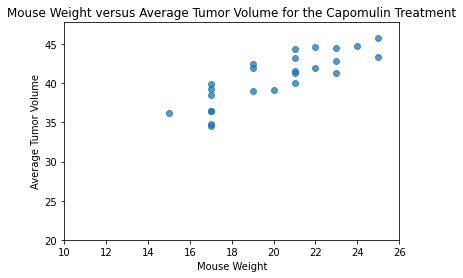

In [142]:
# Generate a scatter plot of mouse weight versus AVERAGE tumor volume for the Capomulin regimen
###create the new Capomulin only records
capomulin_regimen=cleaned_df.loc[cleaned_df['Drug Regimen']=='Capomulin']
capomulin_regimen_ave=capomulin_regimen.groupby(['Mouse ID']).agg([np.mean])
aveweight = capomulin_regimen_ave.iloc[:,4]
avevolume = capomulin_regimen_ave.iloc[:,1]
plt.scatter(capomulin_regimen_ave.iloc[:,4],capomulin_regimen_ave.iloc[:,1], alpha=.75)
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.title('Mouse Weight versus Average Tumor Volume for the Capomulin Treatment')
plt.ylim(20,max(avevolume)+2)
plt.xlim(10,max(aveweight)+1)
plt.show()

## Correlation and Regression

The correlation between both factors is 0.84


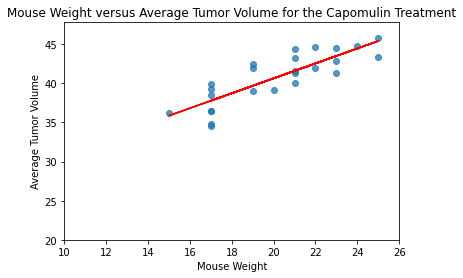

In [141]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(aveweight,avevolume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

## Linear Regression model between mouse weight & average tumor volume for the Capomulin Treatment
### calculate the average Tumor Volume 

wv_slope, wv_int, wv_r, wv_p, wv_std_err = st.linregress(aveweight, avevolume)

# Create equation of line to calculate predicted trend
wv_fit = wv_slope * aveweight + wv_int

### # Plot the linear model on top of the previous scatter plot 
plt.scatter(aveweight,avevolume, alpha=.75)
plt.plot(aveweight,wv_fit,'r-')
plt.xlim(10,max(aveweight)+1)
plt.ylim(20,max(avevolume)+2)
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.title('Mouse Weight versus Average Tumor Volume for the Capomulin Treatment')
plt.show()
